# 2.4.1 지리적 데이터 시각화

In [1]:
import pandas as pd
housing = pd.read_csv('housing_train.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


<Axes: xlabel='longitude', ylabel='latitude'>

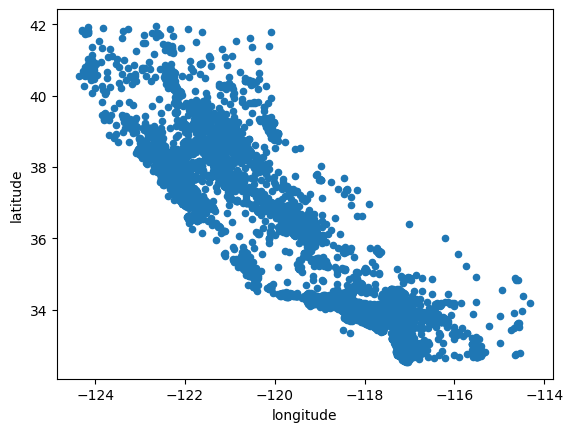

In [2]:
housing.plot(kind='scatter',x='longitude',y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

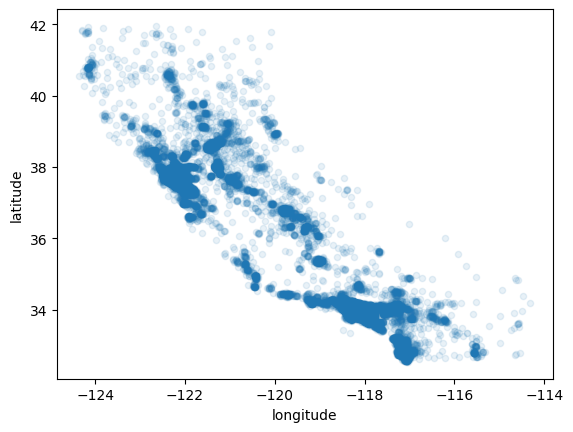

In [3]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

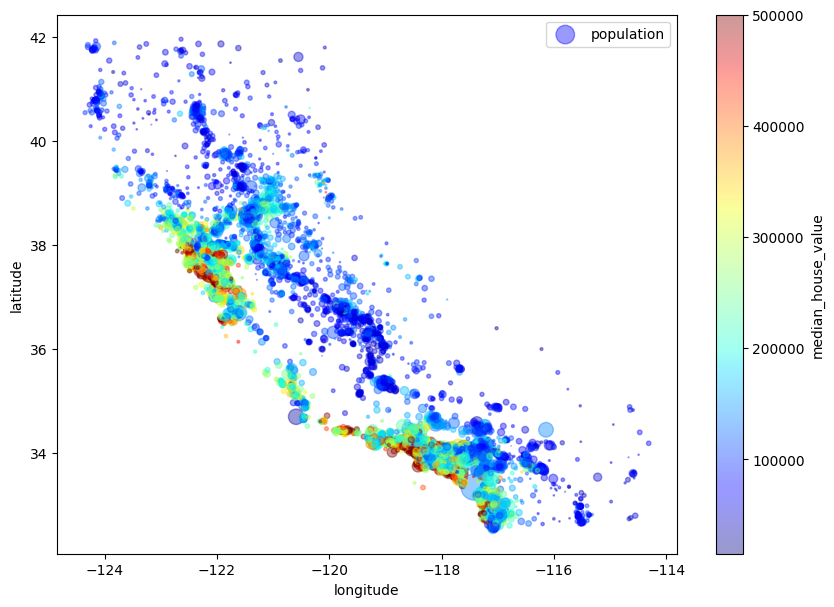

In [6]:
import matplotlib.pyplot as plt
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing['population']/100,label='population',figsize=(10,7),
             c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,)
plt.legend()

# 2.4.2 상관관계 조사

## 히트맵

In [10]:
import numpy as np
numerical_columns = housing.select_dtypes(include=[np.number])
corr_matrix = numerical_columns.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [11]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

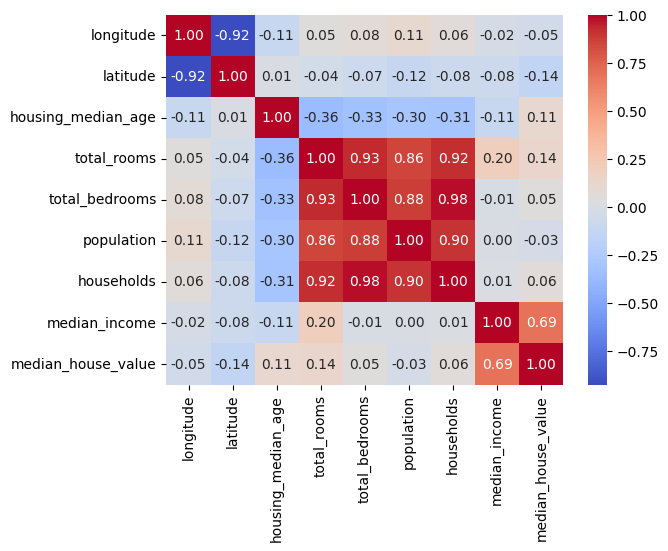

In [12]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## 산점도 행렬

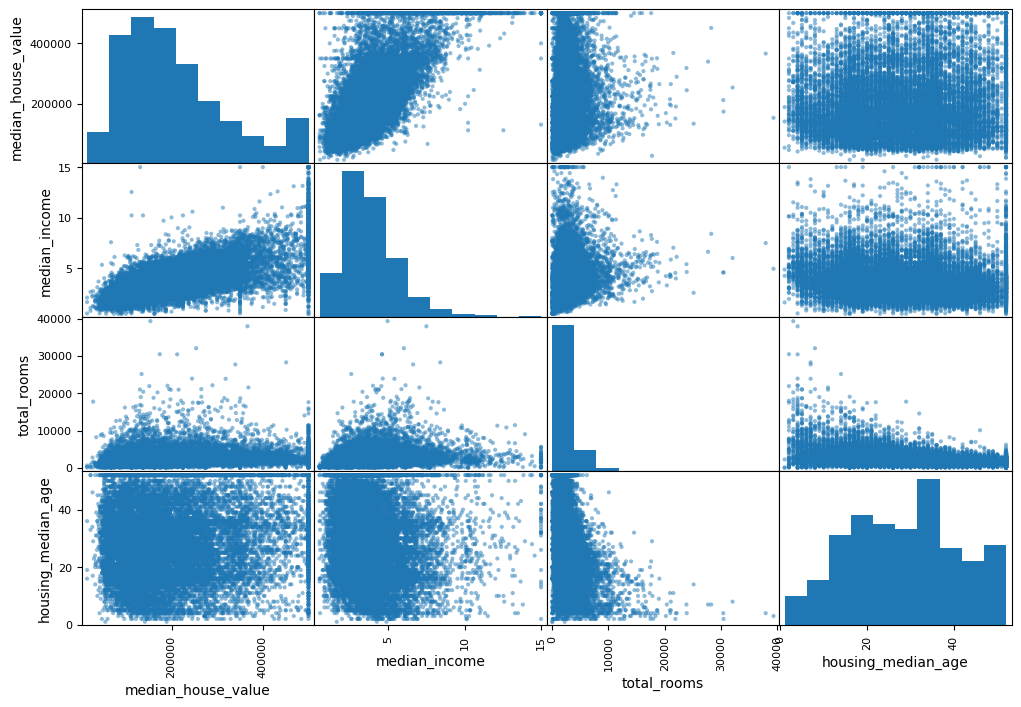

In [14]:
from pandas.plotting import scatter_matrix

# 특정 열 선택 (예: 'median_house_value', 'median_income', 'total_rooms')
attr = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attr], figsize=(12, 8))
plt.show()


## pairplot

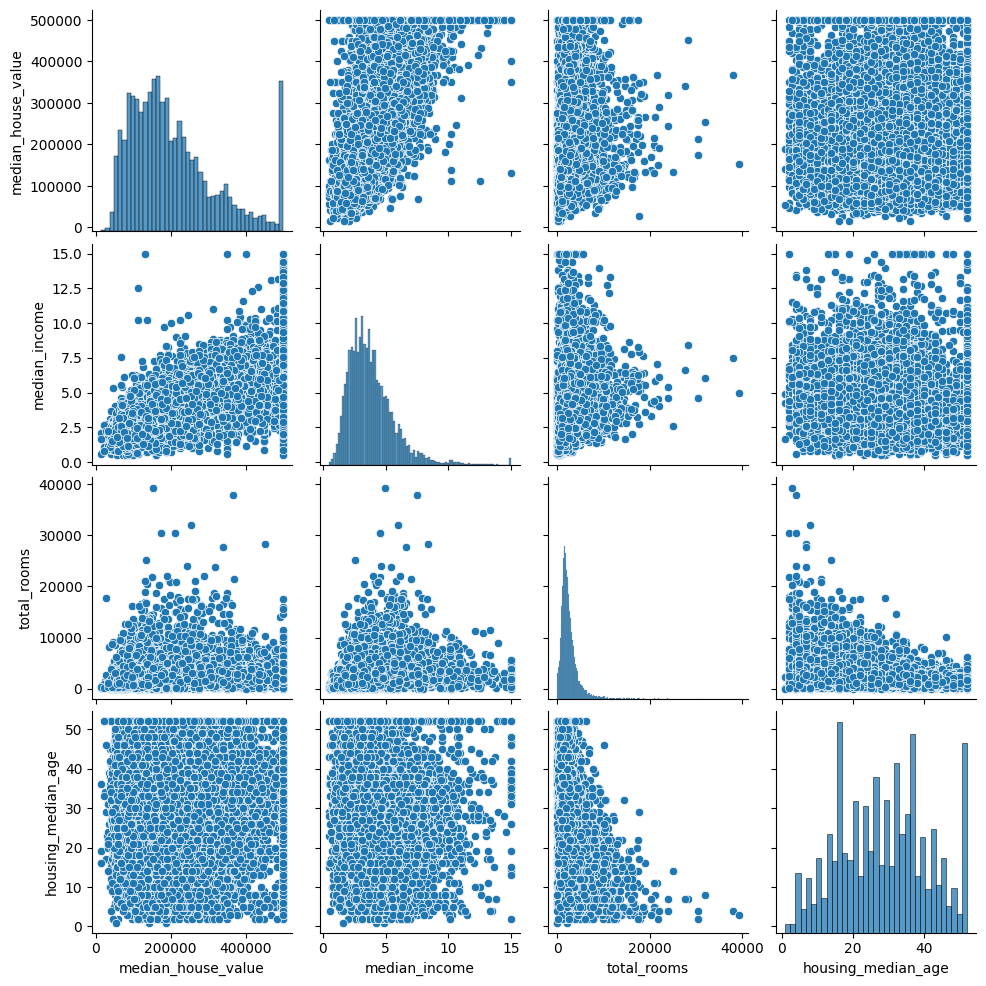

In [15]:
sns.pairplot(housing[attr])
plt.show()

## 상관관계 네트워크

/Users/songye/opt/anaconda3/envs/aiffel2/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


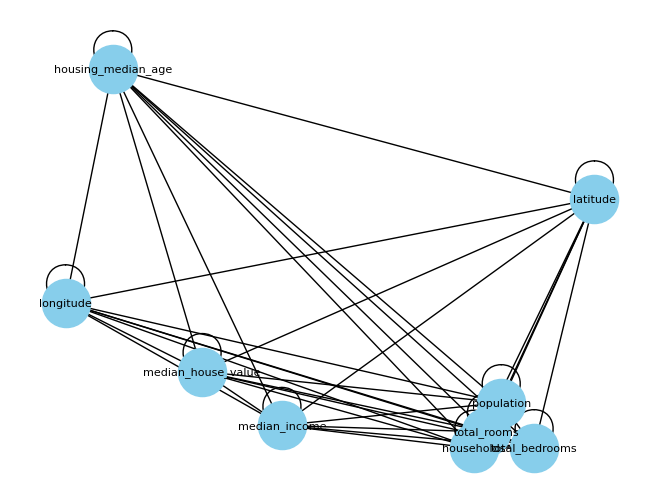

In [18]:
import networkx as nx

# 상관 행렬을 그래프로 변환
G = nx.from_numpy_array(corr_matrix.values)

# 그래프 시각화
pos = nx.spring_layout(G)
labels = {i: col for i, col in enumerate(corr_matrix.columns)}
nx.draw(G, pos, labels=labels, with_labels=True, font_size=8, node_color='skyblue', node_size=1200, cmap=plt.cm.Blues)
plt.show()


# 2.4.3 특성 조합으로 실험  